In [1]:
from examples.wmt_2020.common.util.reader import read_annotated_file, read_test_file
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

TRAIN_FILE = "data/si-en/train.sien.df.short.tsv"
DEV_FILE = "data/si-en/dev.sien.df.short.tsv"
TEST_FILE = "data/si-en/test20.sien.df.short.tsv"

train = read_annotated_file(TRAIN_FILE)
dev = read_annotated_file(DEV_FILE)
test = read_test_file(TEST_FILE)

train[:10]

,index,original,translation,z_mean
0,0,රහත් භාවයට පත් වූ කාශ්‍යප තෙරුණුවෝ තමන් වහන්සේ...,Since the secrets of the carnival thresholds t...,-1.088560
1,1,ප්‍රංශය සමග වු මෙම අර්ධ යුද්ධය යුරෝපය සමග ඇතිව...,This particular war with France was an escalat...,0.976268
2,2,සංගා සිය ගෝත්‍රයේ වැසියන්ට දිය ඇල්ල හරහා වූ රහ...,Sangha tells the citizens of hundreds of tribe...,0.551873
3,3,අපි මුලින්ම හඳුනගත්ත පැකිසිටස් ෆොසිල වාර්තා වල...,This is why we first identified pachycetus fos...,-0.009462
4,4,දෙවැන්න ප්‍රෝටීන් ආවරණය; ජානමය කොටසට ආරක්ෂාව ස...,Second protein shield; provides protection to ...,0.322577
5,5,මෙලෙසින් නැවී කෘත්‍යමය ප්‍රෝටීන සෑදෙනු වෙනුවට ...,Melazine Navigation creates a protein correlat...,0.846007
6,6,සෑම අවුරුදු මිලියන ගණනකම සත්ත්ව ප්‍රවේනි ද්‍රව...,"Every million years, hundreds of genres are co...",-1.016323
7,7,සමහර බැක්ටීරියා රෝග ඇත්තටම බැක්ටීරියා මගින් ඇත...,Some bacterial diseases actually cause environ...,0.202254
8,8,සාමාන්ය ගම්බද ගොවිජනතාවට මෙන් නොව මොවුහු එංගලන...,"Unlike ordinary village farming, he was immers...",-1.106789
9,9,නමුත් සංවිධානාත්මක බවකින් යුක්තව කැරළි සිදුවන ...,But in organization that rebellion will occur ...,-1.230660


In [2]:
train.describe()

,z_mean
count,7000.000000
mean,-0.030267
std,0.959867
min,-2.008436
25%,-0.924167
50%,-0.053059
75%,0.860927
max,1.888418


In [3]:
dev.describe()

,z_mean
count,1000.000000
mean,-0.020188
std,0.795660
min,-1.785447
25%,-0.698446
50%,-0.029522
75%,0.508786
max,1.911038


mean-original 14.15 std-original 4.36 mean-translation 15.55 std-translation 6.87 max-original 29.00 max-translation 130.00


<Figure size 432x288 with 0 Axes>

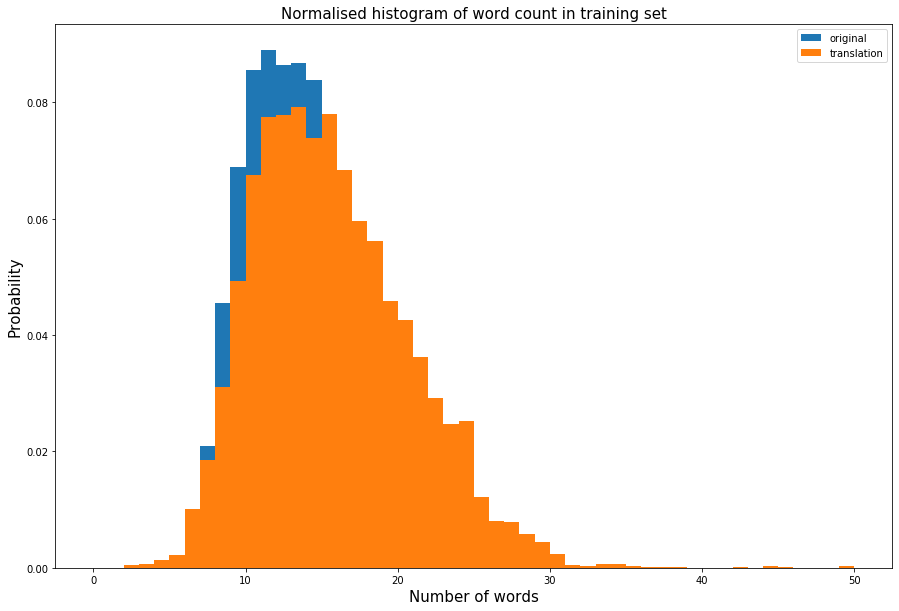

In [4]:
import matplotlib.pyplot as plt

plt.figure()
original_qs = pd.Series(train['original'].tolist()).astype(str)
translation_qs = pd.Series(train['translation'].tolist()).astype(str)

dist_original = original_qs.apply(lambda x: len(x.split(' ')))
dist_translation = translation_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_original, bins=50, range=[0, 50], normed=True, label='original')
plt.hist(dist_translation, bins=50, range=[0, 50], normed=True, label='translation')
plt.title('Normalised histogram of word count in training set', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-original {:.2f} std-original {:.2f} mean-translation {:.2f} std-translation {:.2f} max-original {:.2f} max-translation {:.2f}'.format(dist_original.mean(),
                          dist_original.std(), dist_translation.mean(), dist_translation.std(), dist_original.max(), dist_translation.max()))

mean-original 14.29 std-original 4.36 mean-translation 15.58 std-translation 6.09 max-original 26.00 max-translation 101.00


<Figure size 432x288 with 0 Axes>

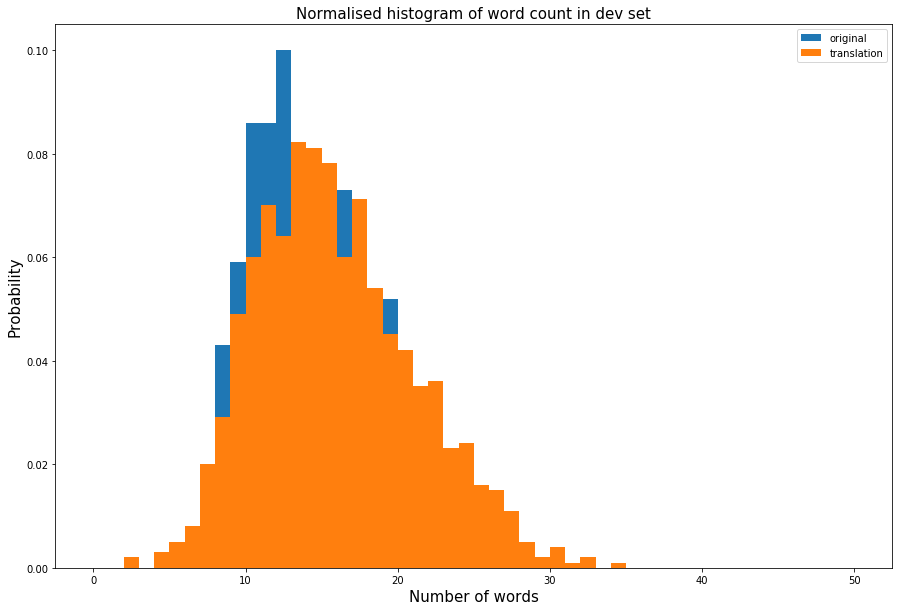

In [5]:

import matplotlib.pyplot as plt

plt.figure()
original_qs = pd.Series(dev['original'].tolist()).astype(str)
translation_qs = pd.Series(dev['translation'].tolist()).astype(str)

dist_original = original_qs.apply(lambda x: len(x.split(' ')))
dist_translation = translation_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_original, bins=50, range=[0, 50], normed=True, label='original')
plt.hist(dist_translation, bins=50, range=[0, 50], normed=True, label='translation')
plt.title('Normalised histogram of word count in dev set', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-original {:.2f} std-original {:.2f} mean-translation {:.2f} std-translation {:.2f} max-original {:.2f} max-translation {:.2f}'.format(dist_original.mean(),
                          dist_original.std(), dist_translation.mean(), dist_translation.std(), dist_original.max(), dist_translation.max()))





